In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [8]:
df_sleep = pd.read_csv('./csv/2018_sleep.csv')
df_sleep['total_sleep_time'] =df_sleep['total_sleep_time']/60 

In [10]:
df_sleep=df_sleep.sort_values('total_sleep_time').reset_index()

In [11]:
x=df_sleep['total_sleep_time']
y=df_sleep['sleep_score']

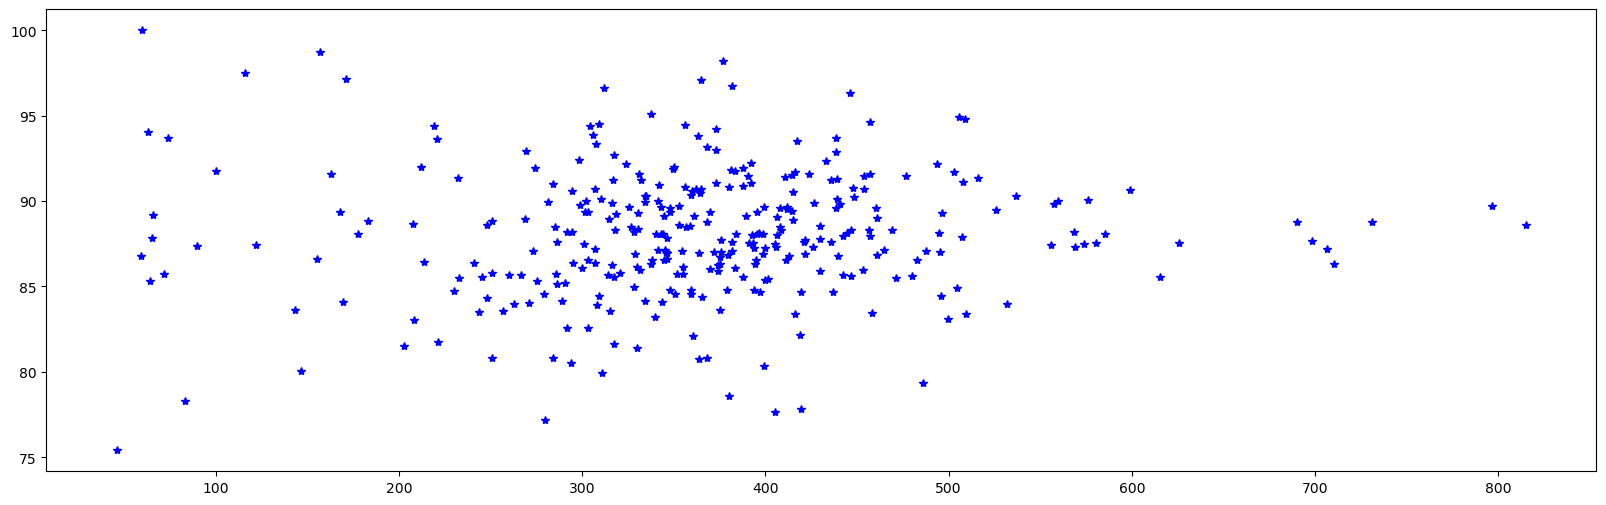

In [19]:
#### 시간별 sleep score
plt.figure(figsize=(20,6))
plt.plot(x,y,'*b')

### 선형 회귀식 

In [22]:
 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler

In [23]:
line_fitter = LinearRegression()

line_fitter.fit(x.values.reshape(-1,1),y)



LinearRegression()

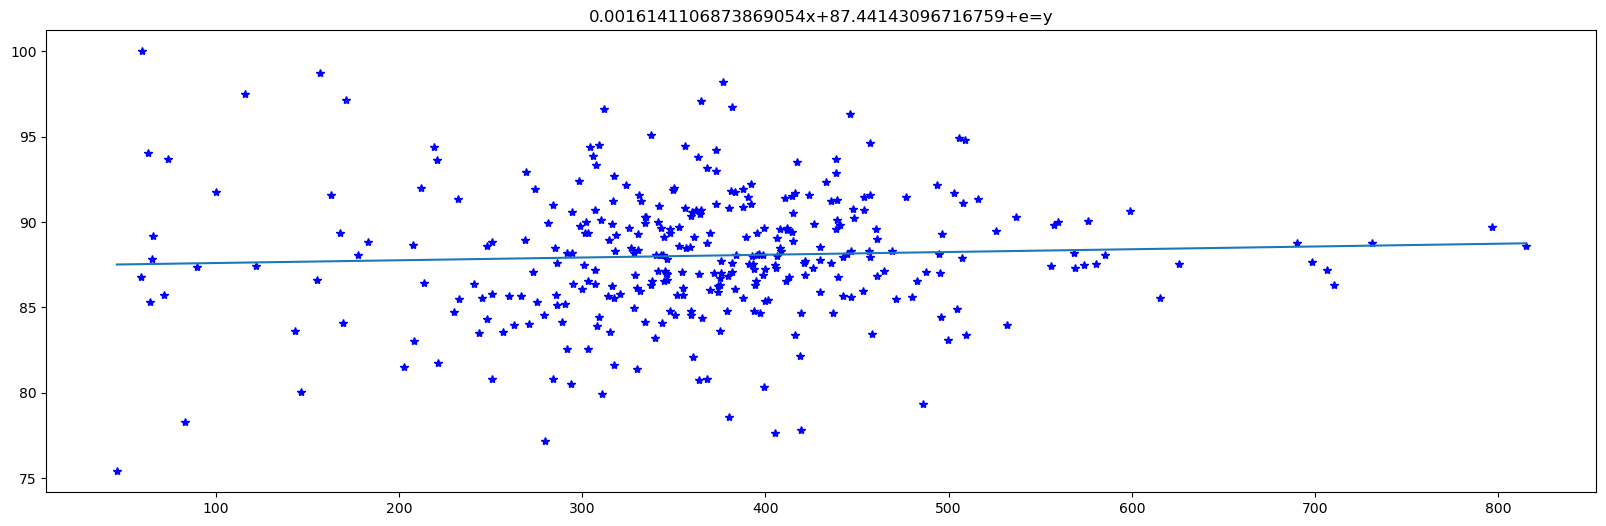

In [24]:
plt.figure(figsize=(20,6))
plt.plot(x,y,'*b')
plt.plot(x,line_fitter.predict(x.values.reshape(-1,1)))
plt.title('{0}x+{1}+e=y'.format(line_fitter.coef_[0],line_fitter.intercept_))
plt.show()

In [91]:
line_fitter.coef_ [0], line_fitter.intercept_

(0.0016141106873869054, 87.44143096716759)

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
## 가장 적합한 회귀 차수 후보 검출
poly_sel=[]
for i in range(2,101):
    pr = LinearRegression()
    penta = PolynomialFeatures(degree=i)
    x_quad = penta.fit_transform(x.values.reshape(-1,1))
    pr.fit(x_quad,y)
    y_quad_fit = pr.predict(penta.fit_transform(x.values.reshape(-1,1)))
    poly_sel.append(abs(y_quad_fit -y).mean())

In [27]:
m= min(poly_sel)
[i for i , v in enumerate(poly_sel) if v==m]

[8]

In [29]:
### 짝수 차수는 8, 홀수는 9를 선정 가장 오차가 작은 차수 기준
poly_df = pd.DataFrame(poly_sel)
poly_df.nsmallest(4,0)

,0
8,2.815351
9,2.815962
10,2.816340
12,2.816382


### 짝수 다항 함수는 8차가 최소, 홀수 다항 함수는 9차가 최소 오차함수

In [30]:
pr8 = LinearRegression()
octa = PolynomialFeatures(degree=8)
x_octa = octa.fit_transform(x.values.reshape(-1,1))
pr8.fit(x_octa,y)
y_octa_fit = pr8.predict(octa.fit_transform(x.values.reshape(-1,1)))
pr9 = LinearRegression()
Nona= PolynomialFeatures(degree=9)
x_Nona = Nona.fit_transform(x.values.reshape(-1,1))
pr9.fit(x_Nona,y)
y_Nona_fit = pr9.predict(Nona.fit_transform(x.values.reshape(-1,1)))


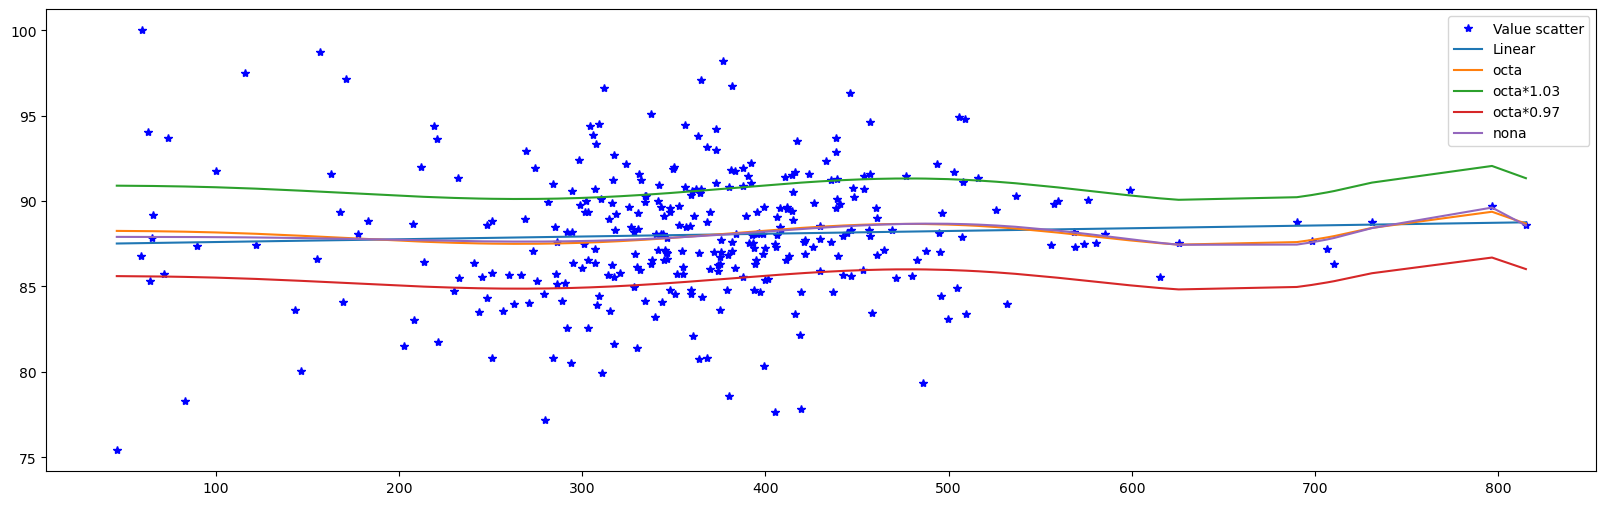

In [35]:
plt.figure(figsize=(20,6))
plt.plot(x,y,'*b')
plt.plot(x,line_fitter.predict(x.values.reshape(-1,1)))
plt.plot(x,y_octa_fit)
plt.plot(x,y_octa_fit*1.03)
plt.plot(x,y_octa_fit*0.97)
plt.plot(x,y_Nona_fit)
plt.legend(('Value scatter','Linear','octa','octa*1.03','octa*0.97','nona'))
plt.show()

In [36]:
### 8차 회귀(오차 3% 이상 이하) 를 기준으로 ABC class를 구분 해당 회귀식으로 검출 불가하다고 판정되는
### 상 하 집단에 대한 구분

In [37]:
e00=line_fitter.predict(x.values.reshape(-1,1))-y

In [38]:
e01= y_octa_fit - y

In [39]:
e02=y_Nona_fit-y

In [40]:
df_sleep['E00'] = e00

In [41]:
df_sleep['E01'] = e01
df_sleep['E02'] = e02

In [42]:
df_sleep=df_sleep.drop(['index'],axis=1).reset_index()


In [43]:
df_sleep.sort_values('userId',inplace=True)

In [44]:
### 각 회귀식별 오차를 각 유저별로 저장
for i in range(1,31):
    df_user  = df_sleep[df_sleep['userId']==i][['startDt','E00','E01','E02']]
    df_user.to_csv('./df_user_{}_cal.csv'.format(i))